# Método de Simulación

### Grupo 8

Javier Darna Sequeiros, Tingyun Wei, Zihao Hong

# Algoritmo de Ziggurat

In [24]:
# imports
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from scipy.integrate import quad
import pandas as pd

import zignor

### 1. Generación de	números y variables aleatorias
Describir el algoritmo de Ziggurat para	distribuciones con función de densidad decreciente y compararlo	con	otros métodos para la generación de	valores	de la normal

In [2]:
def pdf_standard_normal_distribution(x):
    return (1 / (np.sqrt(2 * np.pi))) * np.exp((x ** 2) / -2)

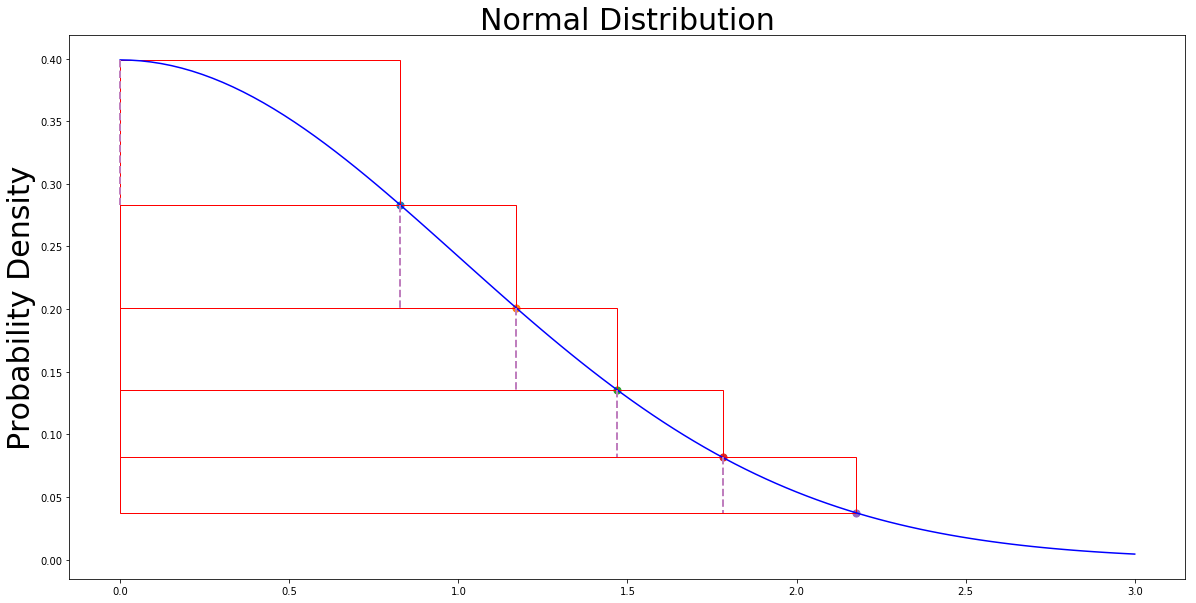

In [3]:
DOMAIN = 3
N = 100
POINT_SIZE = 50
TITLE_SIZE = 30
FIGURE_SIZE = (20, 10)

domain = np.linspace(0, DOMAIN, N) # return a domain from [0, 1] in 100 parts

divisions = [0, 0.8288, 1.1713, 1.4696, 1.7819, 2.1761]

fig, ax = plt.subplots(figsize=(FIGURE_SIZE[0], FIGURE_SIZE[1]));

# config
ax.set_title('Normal Distribution', size = TITLE_SIZE);
ax.set_ylabel('Probability Density', size = TITLE_SIZE);

ax.plot(domain, list( # domain is the x axis and the rest y axis
    map(
        lambda x: pdf_standard_normal_distribution(x), 
        domain
    )
), color = 'b')
currentAxis = plt.gca()

for i in range(1, len(divisions)):
    y = pdf_standard_normal_distribution(divisions[i]) # calculate its y axis value
    y_prev = pdf_standard_normal_distribution(divisions[i - 1]) # calculate divisions i - 1 y axis value
    
    plt.scatter(divisions[i], y, s = POINT_SIZE) # draw point s is size
    rect = patches.Rectangle((0, y), divisions[i], y_prev - y, linewidth = 1, edgecolor = 'r', fill = None) # draw rectangle
    plt.plot([divisions[i - 1], divisions[i - 1]], [y_prev, y], color = '#BF7EBE', linewidth = 2, linestyle = 'dashed') # draw lines
    
    currentAxis.add_patch(rect) # add rectangle

plt.show()
plt.close()

## Esto es con negrita
Explicaciones

Utilizando el algoritmo	de Ziggurat obtener	una	aproximación de	la tabla de	la tabla de	la distribución normal estándar.	

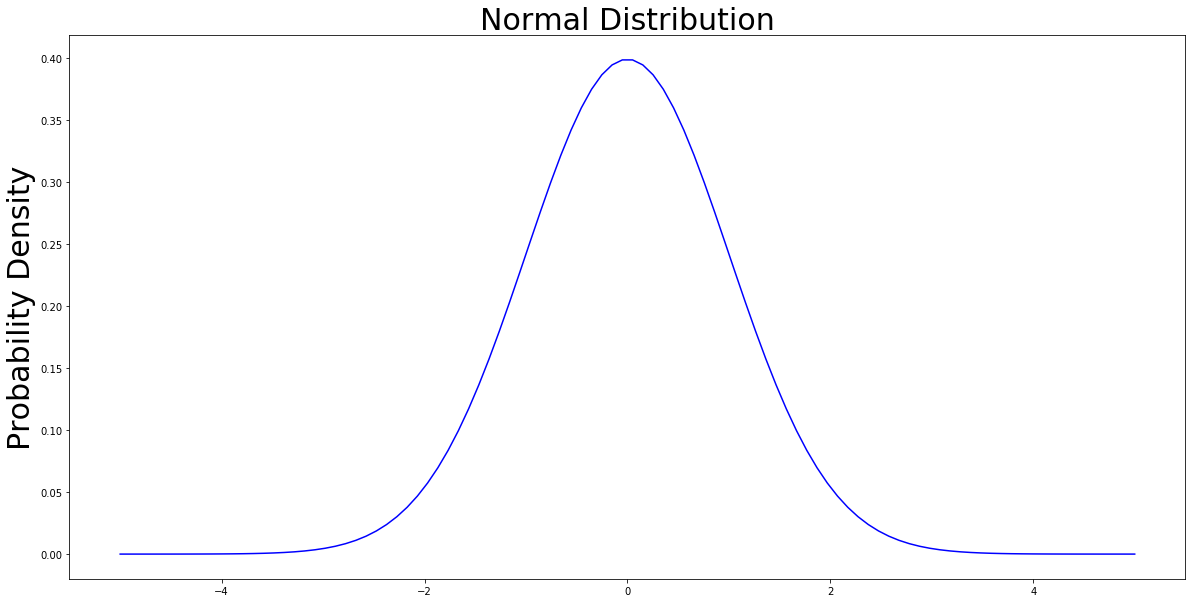

In [14]:
DOMAIN = 5
N = 100
TITLE_SIZE = 30
FIGURE_SIZE = (20, 10)

domain = np.linspace(-DOMAIN, DOMAIN, N) # return a domain from [0, 1] in 100 parts

fig, ax = plt.subplots(figsize=(FIGURE_SIZE[0], FIGURE_SIZE[1]));

# config
ax.set_title('Normal Distribution', size = TITLE_SIZE);
ax.set_ylabel('Probability Density', size = TITLE_SIZE);

ax.plot(domain, list( # domain is the x axis and the rest y axis
    map(
        lambda x: pdf_standard_normal_distribution(x), 
        domain
    )
), color = 'b')

plt.show()

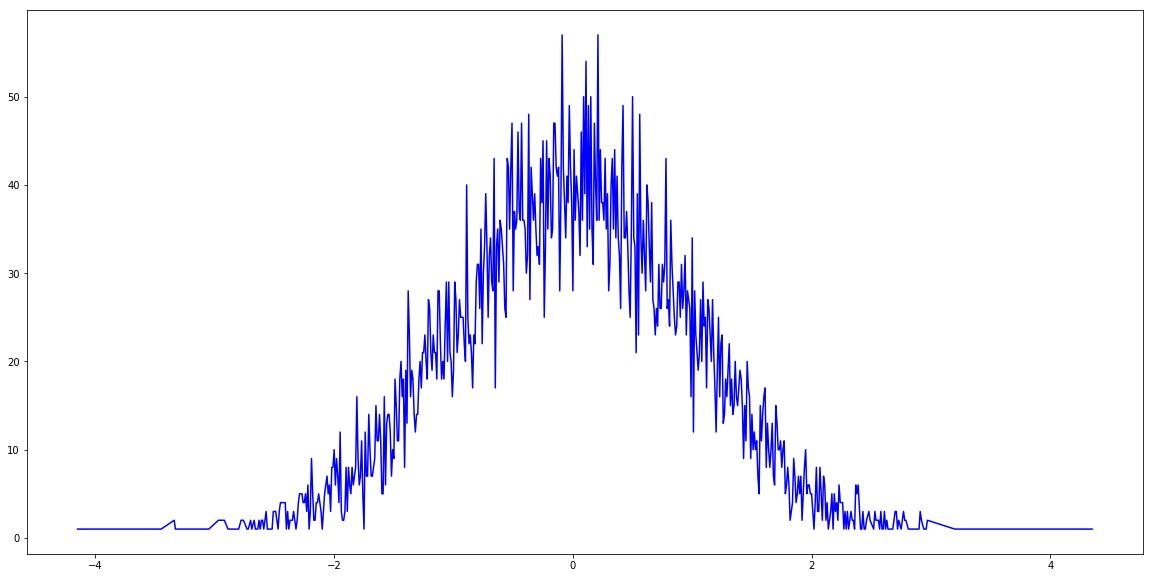

In [37]:
POINT_SIZE = 50
N = 10000

random_numbers = zignor.randn(N)

counter = {}
for rand in random_numbers:
    round_rand_number = np.round(rand, 2)
    counter[round_rand_number] = counter.get(round_rand_number, 0) + 1
    
x_axis = sorted(list(counter.keys()))
y_axis = list(map(lambda x : counter[x], x_axis))

fig, ax = plt.subplots(figsize=(FIGURE_SIZE[0], FIGURE_SIZE[1]));

ax.plot(x_axis, y_axis, color = 'b')

plt.show()

### 2. Generación de	números y variables aleatorias
Describir el algoritmo de Ziggurat para	distribuciones con función de densidad decreciente y compararlo	con	otros métodos para la generación de	valores	de la normal

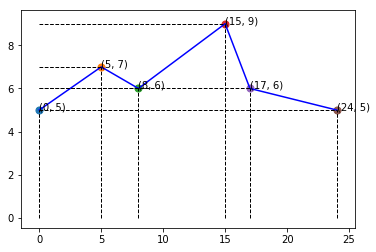

In [6]:
POINT_SIZE = 50

values = [(0, 5), (5, 7), (8, 6), (15, 9), (17, 6), (24, 5)]
x_axis = list(map(lambda x : x[0], values))
y_axis = list(map(lambda y : y[1], values))

fig, ax = plt.subplots()
plt.plot(x_axis, y_axis, color = 'b')
for i in values:
    plt.scatter(i[0], i[1], s = POINT_SIZE) # draw point s is size
    ax.annotate("(" + str(i[0]) + ", " + str(i[1]) + ")", (i[0], i[1])) # add labels
    plt.plot([i[0], i[0]], [0, i[1]], color = 'black', linewidth = 1, linestyle = 'dashed') # draw vertical lines
    plt.plot([0, i[0]], [i[1], i[1]], color = 'black', linewidth = 1, linestyle = 'dashed') # draw horizontal lines
plt.show()
